**Table of contents**<a id='toc0_'></a>    
- [Importation des données](#toc1_)    
- [Stabilité des clusters dans le temps](#toc2_)    
  - [Evolution de l'ARI](#toc2_1_)    
- [Caractéristiques des groupes](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Importation des données](#toc0_)

In [1]:
import pickle
input1 = open("df.pickle", "rb")
df = pickle.load(input1)
input1.close()

input1 = open("kmean.pickle", "rb")
kmean = pickle.load(input1)
input1.close()


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
import datetime as dt
import warnings
import sklearn
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

 
# <a id='toc2_'></a>[Stabilité des clusters dans le temps](#toc0_)

In [2]:
from dateutil.relativedelta import relativedelta
from numpy import NAN
warnings.simplefilter("ignore")
tmp = df[df["order_purchase_timestamp"]>= "2017-01-01 00:00:00"]
tmp["periods"] = NAN
currentDate = min(tmp.order_purchase_timestamp)
lastDate = min(tmp.order_purchase_timestamp)
a = 0
while(lastDate < max(df.order_purchase_timestamp) ):
    tmp.loc[(tmp["order_purchase_timestamp"] < currentDate + relativedelta(months=+3))  &
       (tmp["order_purchase_timestamp"] >= lastDate), "periods"] = a
    a += 1
    lastDate = currentDate 
    currentDate = currentDate + relativedelta(months=+3)


<AxesSubplot: xlabel='order_purchase_timestamp', ylabel='Exeted_time'>

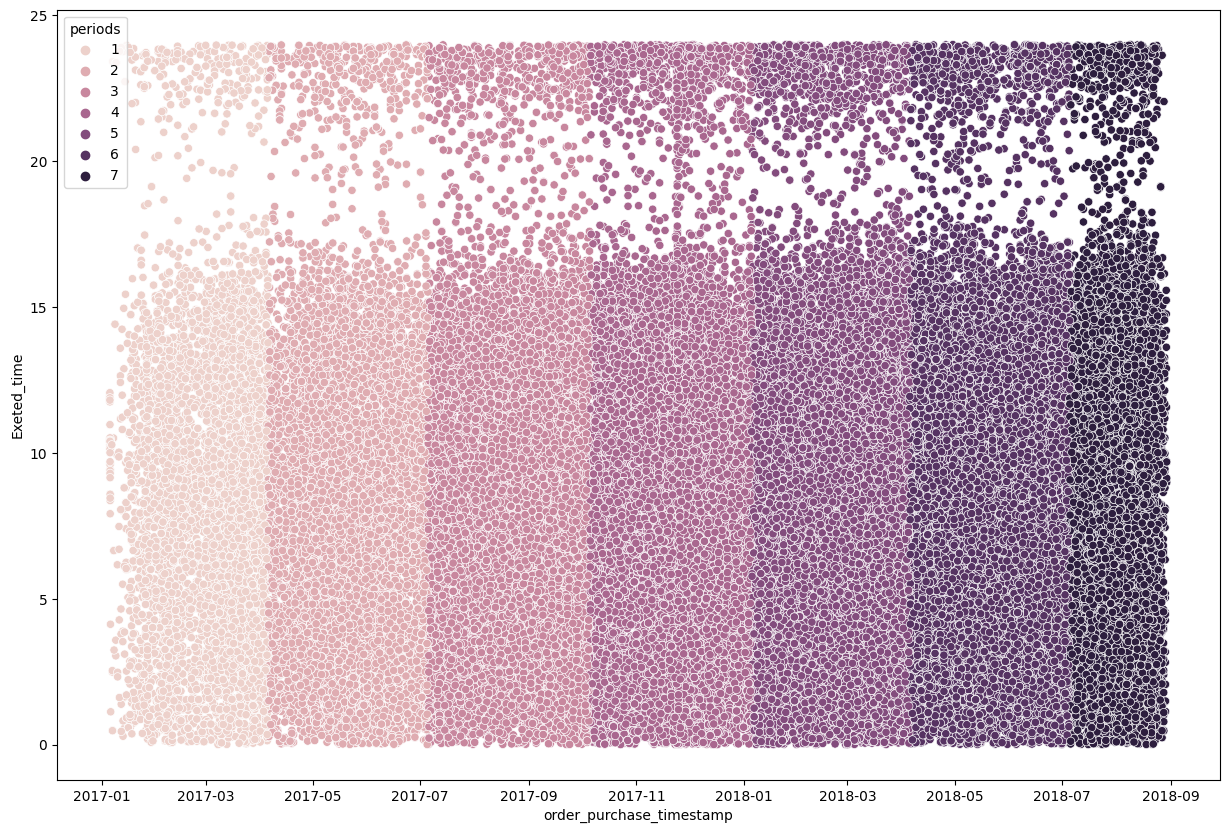

In [3]:
plt.figure(figsize=(15,10))
sn.scatterplot(x = tmp.order_purchase_timestamp, y = tmp.Exeted_time, hue= tmp.periods)

## <a id='toc2_1_'></a>[Evolution de l'ARI](#toc0_)

In [4]:
from sklearn.metrics.cluster import adjusted_rand_score
warnings.simplefilter("ignore")

ARI = []
# fit sur bloc 1
tmp2 = tmp[tmp["periods"] == 1]
X = tmp2.drop([ "geolocation_zip_code_prefix", "periods", "payment_value", "order_id", "seller_id", "customer_unique_id", 'seller_geolocation_lat', 'seller_geolocation_lng', 'order_purchase_timestamp', 'geolocation_zip_code_prefix'], axis = 1)
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
kmeans2 = KMeans(n_clusters=6)

for period in range(2, 7):
    # predict sur bloc 2
    tmp3 = tmp[tmp["periods"]  == period + 1]
    X2 = tmp.drop([ "geolocation_zip_code_prefix", "periods", "payment_value", "order_id", "seller_id", "customer_unique_id", 'seller_geolocation_lat', 'seller_geolocation_lng', 'order_purchase_timestamp', 'geolocation_zip_code_prefix'], axis = 1)
    ClA = kmeans.predict(X2)

    # fit sur les blocs inférieures au bloc 2 
    tmp4 = tmp[tmp["periods"]  <= period + 1]
    X3 = tmp.drop([ "geolocation_zip_code_prefix", "periods", "payment_value", "order_id", "seller_id", "customer_unique_id", 'seller_geolocation_lat', 'seller_geolocation_lng', 'order_purchase_timestamp', 'geolocation_zip_code_prefix'], axis = 1)
    kmeans2.fit(X3)
    ClB = kmeans2.predict(X2)
    
    ARI.append(adjusted_rand_score(ClA, ClB))


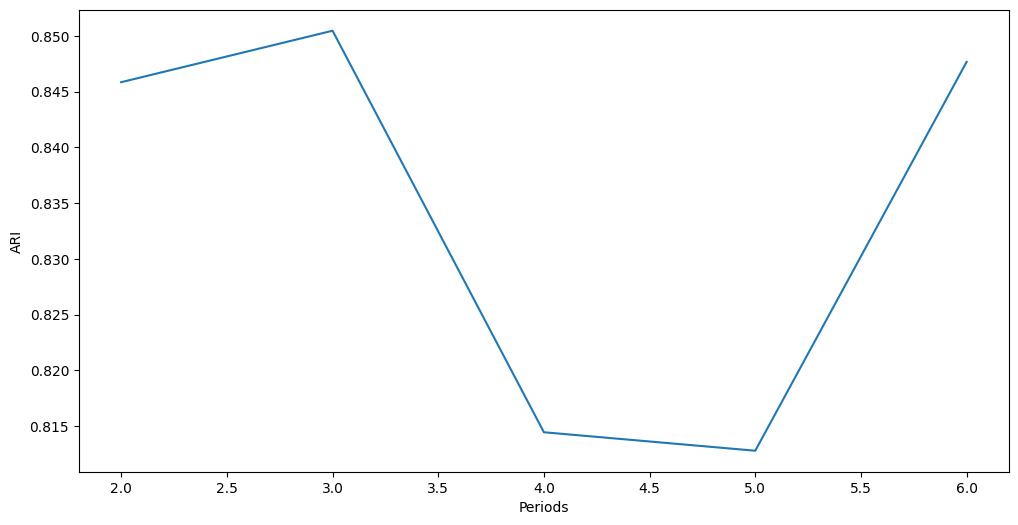

In [5]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.set_ylabel("ARI")
ax.set_xlabel("Periods")
ax = plt.plot(range(2, 7), ARI)
ax

# <a id='toc3_'></a>[Caractéristiques des groupes](#toc0_)

In [21]:
# fit sur bloc 1
tmp = tmp.drop(['seller_geolocation_lng', 'seller_geolocation_lat',"geolocation_zip_code_prefix", "geolocation_zip_code_prefix", "periods", "payment_value", "order_id", "seller_id", "customer_unique_id", 'seller_geolocation_lat', 'seller_geolocation_lng', 'order_purchase_timestamp', 'geolocation_zip_code_prefix'], axis = 1)
X = tmp
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
tmp["kmeans"] = kmeans.labels_

In [20]:
tmp.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'order_purchase_timestamp', 'price', 'freight_value', 'payment_value',
       'review_score', 'product_description_lenght', 'product_photos_qty',
       'time_to_receive', 'Exeted_time', 'seller_geolocation_lat',
       'seller_geolocation_lng', 'payment_type_boleto',
       'payment_type_credit_card', 'payment_type_debit_card',
       'payment_type_voucher', 'product_category_name_english_audio',
       'product_category_name_english_auto',
       'product_category_name_english_baby',
       'product_category_name_english_books',
       'product_category_name_english_construction',
       'product_category_name_english_cool_stuff',
       'product_category_name_english_electronics',
       'product_category_name_english_fashion',
       'product_category_name_english_furniture',
       'product_category_name_english_gaming',
       'product_category_name_english_home_appliances',
       'product_categor

In [22]:
synthesis = tmp.groupby("kmeans").mean()
synthesis

,geolocation_lat,geolocation_lng,price,freight_value,review_score,product_description_lenght,product_photos_qty,time_to_receive,Exeted_time,payment_type_boleto,...,product_category_name_english_informatic,product_category_name_english_luggage_accessories,product_category_name_english_pet_shop,product_category_name_english_small_appliances,product_category_name_english_sports_leisure,product_category_name_english_stationery,product_category_name_english_telephony,product_category_name_english_tools,product_category_name_english_toys,product_category_name_english_watches_gifts
kmeans,,,,,,,,,,,,,,,,,,,,,
0,-21.202489,-46.206301,103.831917,19.167810,4.108241,715.653419,2.320753,11.083210,8.720131,0.190542,...,0.181050,0.008900,0.023237,0.005352,0.073316,0.012224,0.056473,0.016111,0.050445,0.076189
1,-20.418781,-46.077778,255.150791,21.483940,4.126724,3216.535785,3.011162,10.942638,9.044301,0.209783,...,0.399869,0.000328,0.004924,0.015102,0.198949,0.000328,0.028234,0.009192,0.008536,0.082075
2,-21.206731,-46.163385,146.950558,22.366032,4.127722,1991.616566,2.394656,11.118044,8.750500,0.190514,...,0.230728,0.003607,0.020040,0.011757,0.130127,0.004275,0.032331,0.092051,0.014429,0.003741
3,-21.411101,-46.209209,86.381983,18.247185,4.049554,306.444279,1.979003,11.287256,8.716413,0.195991,...,0.153825,0.010153,0.010520,0.003456,0.046724,0.043073,0.038516,0.063249,0.034174,0.052773
4,-20.013350,-45.989882,1209.363842,57.049846,4.121852,1037.822096,2.613323,11.220681,8.617669,0.134037,...,0.181966,0.002437,0.021121,0.049553,0.065800,0.002437,0.048741,0.044679,0.025995,0.177092
5,-21.031541,-46.243877,122.470639,21.663085,4.086789,1216.525815,2.325955,11.060256,8.788387,0.202430,...,0.246525,0.005315,0.027684,0.007651,0.116166,0.003913,0.035860,0.028034,0.032356,0.021960


In [23]:
col=synthesis.columns
scaler = StandardScaler()
scaler.fit(synthesis)
synthesis = scaler.transform(synthesis)
synthesis =pd.DataFrame(synthesis)
synthesis.columns = col

In [24]:
synthesis.columns = synthesis.columns.str.replace(r"product_category_name_english_", "")

In [25]:
synthesisT = synthesis.T
synthesisT["variables"] = synthesisT.index
s0 = synthesisT.loc[:,[0, "variables"]]
s1 = synthesisT.loc[:,[1, "variables"]]
s2 = synthesisT.loc[:,[2, "variables"]]
s3 = synthesisT.loc[:,[3, "variables"]]
s4 = synthesisT.loc[:,[4, "variables"]]
s5 = synthesisT.loc[:,[5, "variables"]]

s0["groupe"] = "0"
s1["groupe"] = "1"
s2["groupe"] = "2"
s3["groupe"] = "3"
s4["groupe"] = "4"
s5["groupe"] = "5"

s0 = s0.rename(columns = {0: "values"})
s1 = s1.rename(columns = {1: "values"})
s2 = s2.rename(columns = {2: "values"})
s3 = s3.rename(columns = {3: "values"})
s4 = s4.rename(columns = {4: "values"})
s5 = s5.rename(columns = {5: "values"})

Synthesis = pd.concat([s0, s1], axis = 0)
Synthesis = pd.concat([Synthesis, s1], axis = 0)
Synthesis = pd.concat([Synthesis, s2], axis = 0)
Synthesis = pd.concat([Synthesis, s3], axis = 0)
Synthesis = pd.concat([Synthesis, s4], axis = 0)
Synthesis = pd.concat([Synthesis, s5], axis = 0)
Synthesis

,values,variables,groupe
geolocation_lat,-0.648072,geolocation_lat,0
geolocation_lng,-0.657606,geolocation_lng,0
price,-0.540620,price,0
freight_value,-0.548431,freight_value,0
review_score,0.170566,review_score,0
...,...,...,...
stationery,-0.481927,stationery,5
telephony,-0.429502,telephony,5
tools,-0.496123,tools,5
toys,0.342924,toys,5


In [26]:
import plotly.express as px
ax = px.line_polar(Synthesis, r="values", theta='variables', line_close=True, color='groupe')
ax.update_layout(autosize=False,width=1500,height=1000)

In [27]:
def radarPlot(df, ligne = 0 , title = ""):    
    """radarPlot _summary_ Radar plot

    _extended_summary_

    Args:
        df (_type_): _description_ A pandas data frame
        ligne (int, optional): _description_. Line number of data frame to use for radar plot. Defaults to 0.
        title (str, optional): _description_.   A string for radar plot title. Defaults to "".

    Returns:
        _type_: _description_ Radar plot
    """
    import plotly.express as px
    import nbformat
nction renvoit "radar plot" pour visualiser les métriques nutritionnelles
    '''
    t = pd.DataFrame(dict(value = df.iloc[ligne,].values, label= df.columns))
    ax = px.line_polar(t, r='value', theta='label', line_close=True, title = title,template = 'ggplot2' )
    plt.show()
    return ax

for a in range(synthesis.shape[0]):    
    plt.figure(figsize=(100,10)) 
    ax = radarPlot(synthesis, a, title = "group " + str(a+1))
    ax.update_layout(
    autosize=False,
    width=1500,
    height=1000)
    ax.show()
    

<Figure size 10000x1000 with 0 Axes>

<Figure size 10000x1000 with 0 Axes>

<Figure size 10000x1000 with 0 Axes>

<Figure size 10000x1000 with 0 Axes>

<Figure size 10000x1000 with 0 Axes>

<Figure size 10000x1000 with 0 Axes>